# Case Study: How Does a Bike-Share Navigate Speedy Success


## Table of Content
1. Introduction
2. Data Loading and Quality
3. Feature Additions and Engineering
4. Exploratory Data Analysis and Statistical Analysis
5. Final Recommendations

## 1. Overview

I am a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. I am tasked to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, your team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives must approve your recommendations, so they must be backed up with compelling data insights and professional data visualizations.

In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime.

## Background

In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geo-tracked and locked into a network of 692 stations across Chicago.

Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments. One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members.

### Business Model:

1. Product: bike-sharing geotracked and network locked bikes across Chicago
2. Customer types and revenue model: members (annual subscribers) and casual riders (single-ride and full-day purchasers)
3. Competitive advantages: Bicycle variety (broad consumer segments) and pricing flexibility

## Stake Holders and Expectations

Cyclistic Executive Team:	Compelling, relevant, and straightforward insights to inform data-driven marketing decisions	Implementing strategic initiatives to promote business growth

Lily Moreno, Director of Marketing:	Evidence to back up her theory and marketing recommendations	Convert a sizable group of casual riders to become annual members.

Marketing analytics team:	Uncovering the differences and motivations behind different customer types	Produce data-driven and actionable results to inform business decision making

cyclist users:

## Problem Statement

Cyclistic is faced with an uncertain future and is no longer able to solely rely on its traditional marketing strategies of raising general awareness and appealing to a variety of customer needs. In the interest of company growth, the director of marketing believes that Cyclistic should capitalize on the lucrative profit margins of annual subscribers by marketing to existing casual customers and persuading them to become yearly subscribers. If that strategy is plausible, a well-executed marketing campaign may lead to more sustainable long-term revenue. To that end, we need to analyze how and why Cyclistic casual bikers and members differ to weigh any evidence, opportunities, and barriers to any future marketing strategy.

## Case study
This report will examine the business question: 'what is the most effective marketing strategy to converting Cyclistic’s casual riders to annul memberships?'

It is understood that the goal can be broken down into 3 main questions.

How do annual members and casual riders use Cyclistic bikes differently?
Why would casual riders buy Cyclistic annual memberships?
How can Cyclistic use digital media to influence casual riders to become members?
This report will seek to deliver on the following objectives:

How do annual members and casual riders use Cyclistic bikes differently?

## Data sources
User data from the past 12 months, January 2021 - December 2021 has been made available. Each data set is in csv format and details every ride logged by Cyclistic customers. This data has been made publicly available via license by Motivate International Inc. and the city of Chicago available here. All user’s personal data has been scrubbed for privacy.


## Tools for analysis
Python is being used due to the data size and visualizations needed to complete this analysis.


## 2. Data Loading and Quality Checks

## Import Data: 

This first part of the project is to preparing data, meaning its in the right place or format to conduct your analysis.The first step of the analysis is to import raw data and clean it. Data comes in 12 csv files.

### Set Up: Library Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import glob
import os
import datetime
from datetime import datetime
import matplotlib.ticker as mtick
import matplotlib.patheffects as path_effects

%matplotlib notebook
%matplotlib inline
%reload_ext autoreload
%autoreload 2

### Read CSV Files DataFrames & Concatenate 
This first part of the project is to preparing data, meaning its in the right place or format to conduct your analysis.The first step of the analysis is to import raw data and clean it. Data comes in 12 csv files.

In [2]:
# Get CSV files list from a folder
path = r'/Users/phoebenamyalo/Desktop/Google Portfolio Project/trip_data_csvs/' # target folder
csv_files = glob.glob(path + "/*.csv")

# Read each CSV file into DataFrame
# This creates a list of dataframes
df_list = (pd.read_csv(file) for file in csv_files)

# Concatenate all DataFrames
df = pd.concat(df_list, ignore_index=True)

### Data preview
Let's look at the first 5 rows of the data frame (df) to see what we need for further analysis

In [3]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,550CF7EFEAE0C618,electric_bike,2022-08-07 21:34:15,2022-08-07 21:41:46,NaN,NaN,NaN,NaN,41.93,-87.69,41.94,-87.72,casual
1,DAD198F405F9C5F5,electric_bike,2022-08-08 14:39:21,2022-08-08 14:53:23,NaN,NaN,NaN,NaN,41.89,-87.64,41.92,-87.64,casual
2,E6F2BC47B65CB7FD,electric_bike,2022-08-08 15:29:50,2022-08-08 15:40:34,NaN,NaN,NaN,NaN,41.97,-87.69,41.97,-87.66,casual
3,F597830181C2E13C,electric_bike,2022-08-08 02:43:50,2022-08-08 02:58:53,NaN,NaN,NaN,NaN,41.94,-87.65,41.97,-87.69,casual
4,0CE689BB4E313E8D,electric_bike,2022-08-07 20:24:06,2022-08-07 20:29:58,NaN,NaN,NaN,NaN,41.85,-87.65,41.84,-87.66,casual




## Data Cleaning:

Now that data is in a dataframe, it is time to inspect them to see if it needs any cleaning. I inspect the dataframe by looking at it's shape attributes and use info method to see the data types and the number of missing values.

In [4]:
# Inspect shape of 'df' dataframe
df.shape

(5829084, 13)

In [5]:
#check for missing values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5829084 entries, 0 to 5829083
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 578.1+ MB


The dataset has 5829084 rows and 13 columns worth of data. There are a couple of problems. The 'started_at' & 'ended_at' strings instead of datetime columns. The 'rideable_type', & 'member_casual' are categorical values. From the look, there are also missing values but will explore that further in the analysis as we go.

In [6]:
# let's convert these low unique count columns into categories
df['rideable_type'] = df['rideable_type'].astype('category')
df['member_casual'] = df['member_casual'].astype('category')

# convert to 'started_at' & 'ended_at' to datetime col
df['started_at'] = pd.to_datetime(df['started_at'],format = "%Y/%m/%d %H:%M:%S")
df['ended_at'] = pd.to_datetime(df['ended_at'],format = "%Y/%m/%d %H:%M:%S")


In [7]:
# check for missing values
df.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    850418
start_station_id      850550
end_station_name      909038
end_station_id        909179
start_lat                  0
start_lng                  0
end_lat                 5938
end_lng                 5938
member_casual              0
dtype: int64

We want every station to have latitude and longitude data. Therefore will delete rows with missing cordinates

In [8]:
# remove missing values without lat & lat
df = df.loc[df['end_lat'].notnull() & df['end_lng'].notnull()]

In [9]:
# explore remaining null values
df[df.isna().any(axis=1)].head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,550CF7EFEAE0C618,electric_bike,2022-08-07 21:34:15,2022-08-07 21:41:46,NaN,NaN,NaN,NaN,41.93,-87.69,41.94,-87.72,casual
1,DAD198F405F9C5F5,electric_bike,2022-08-08 14:39:21,2022-08-08 14:53:23,NaN,NaN,NaN,NaN,41.89,-87.64,41.92,-87.64,casual
2,E6F2BC47B65CB7FD,electric_bike,2022-08-08 15:29:50,2022-08-08 15:40:34,NaN,NaN,NaN,NaN,41.97,-87.69,41.97,-87.66,casual
3,F597830181C2E13C,electric_bike,2022-08-08 02:43:50,2022-08-08 02:58:53,NaN,NaN,NaN,NaN,41.94,-87.65,41.97,-87.69,casual
4,0CE689BB4E313E8D,electric_bike,2022-08-07 20:24:06,2022-08-07 20:29:58,NaN,NaN,NaN,NaN,41.85,-87.65,41.84,-87.66,casual


Stations with missing station_id also have missing start_station_name and end_station which is to be expected.
However they all have ride_id and latitude and longtitude values which makes this data valid.This could possible mean Station locations should be hard to reach and service. They might have inadequate sun exposure, hence low number of riders using these locations.

We could either delete these rows or use inference with GPS coordinates to fill in the station names and IDs. 
However using inference with the GPS coordinates would be incredibly problematic with the variance of GPS coordinates, and the proximity of each station. 

Another thing to consider is that these missing values only comprise 10% of our primary dataset. We can still make good use of the rest of the dataset without compromising our findings since the other 90% will be more than enough to accurately represent consumer behaviors from both Casuals and Members.

So let's drop any rows with missing station names or station ids.

In [10]:
# drop all rows with missing values
df.dropna(inplace=True)
df.isna().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

### Checking for duplicates

In [11]:
# checking the number of unique values per column
print("Unique values per column")
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")

Unique values per column
ride_id: 4497898
rideable_type: 3
started_at: 3899447
ended_at: 3913131
start_station_name: 1576
start_station_id: 1273
end_station_name: 1620
end_station_id: 1283
start_lat: 620657
start_lng: 585860
end_lat: 1399
end_lng: 1390
member_casual: 2


In [12]:
df.shape

(4497898, 13)

"rideable_type" and "member_casual" could benefit from a more efficient data type since they both have a limited number of unique values
"ride_id", presumably the intended primary key of this table, clearly has duplicates since the number of unique values does not conform to the data frame's size
There are more station names than station ids, which implies that many station names are associated with multiple station IDs


In [13]:
# Select all duplicate rows based on one column
duplicates = df[df.duplicated(['ride_id'])]
print("Duplicate Rows based on a ride_id are:", duplicates, sep='\n')

Duplicate Rows based on a ride_id are:
Empty DataFrame
Columns: [ride_id, rideable_type, started_at, ended_at, start_station_name, start_station_id, end_station_name, end_station_id, start_lat, start_lng, end_lat, end_lng, member_casual]
Index: []


## 3. Feature Additions and Engineering

We'll add important columns to assist us in our analysis phase.

1. "ride_length": the length of each ride in minute format
2. "start_day_of_week": the day of the week when the bike was picked up (0 = Monday, 6 = Sunday)
3. "end_day_of_week": the day of the week when the bike was dropped off (0 = Monday, 6 = Sunday)
4. "distance": the great circle distance between the start and end station

In [14]:
# create new col ride_length
df['ride_length'] = (df['ended_at'] - df['started_at'])/np.timedelta64(1, 'm') # turn it into minutes

# create new col for start day of week
df['DayOfWeekNum'] = df['started_at'].dt.dayofweek

# create new col for name of day
df['DayOfWeek'] = df['started_at'].dt.day_name()

# create new col for hour of day
df['HourOfDay'] = df['started_at'].dt.hour

# create new col for month name
df['NameOfMonth'] = (df['started_at'].dt.strftime("%B")).astype('category')

# create a col for day types
df['DayTypes'] = np.where(df['DayOfWeekNum'] >= 5, 'Weekends', 'Workdays')

# create a month number
df["month_number"] = df["started_at"].dt.month


In [15]:
# create a season col
season_dict = {'January': 'Winter',
               'February': 'Winter',
               'March': 'Spring', 
               'April': 'Spring',
               'May': 'Spring',
               'June': 'Summer',
               'July': 'Summer',
               'August': 'Summer',
               'September': 'Fall',
               'October': 'Fall',
               'November': 'Fall',
               'December': 'Winter'}
df['Season'] = df['NameOfMonth'].apply(lambda x: season_dict[x])

In [16]:
# create new col for distance between stations
def distance_btn_stations(lat1, lon1, lat2, lon2):
    """
    distance_btn_stations formula determining the great-circle distance between two points on a sphere in miles
    """
    lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return 3956 * 2 * np.arcsin(np.sqrt(a))

df['distance'] = distance_btn_stations(df['start_lat'],df['start_lng'],df['end_lat'],df['end_lng'])

## 4. Exploratory Data Analysis and Statistical Analysis
We can have a detailed exploration that can be added to this section, but since we only need to answer three questions:

<b> 4.1 Exploring and Understanding basics data </b>

1. Distribution of Data across different groups. While there are only two dtypes in our DataFrame (object and float64), there are three categories of data: location, categorical, and numeric. Each of these require a different kind of exploration in our analysis.
2. Difference of Sales in Account Types (Using Categorical Mean)

<b> 4.2 Statistical Analysis - Answering the Questions</b>
1. How do annual members and casual riders use Cyclistic bikes differently? 
2. Why would casual riders buy Cyclistic annual memberships?
3. How can Cyclistic use digital media to influence casual riders to become members?

## How do annual members and casual riders use Cyclistic bikes differently?

### Categorical Data

In [17]:
# types of bikes used
df['rideable_type'].unique()

['classic_bike', 'electric_bike', 'docked_bike']
Categories (3, object): ['classic_bike', 'electric_bike', 'docked_bike']

In [18]:
# top bikes used by cyclists
df.groupby(['rideable_type'])['ride_id'].count().sort_values(ascending=False)

rideable_type
classic_bike     2663394
electric_bike    1658100
docked_bike       176404
Name: ride_id, dtype: int64

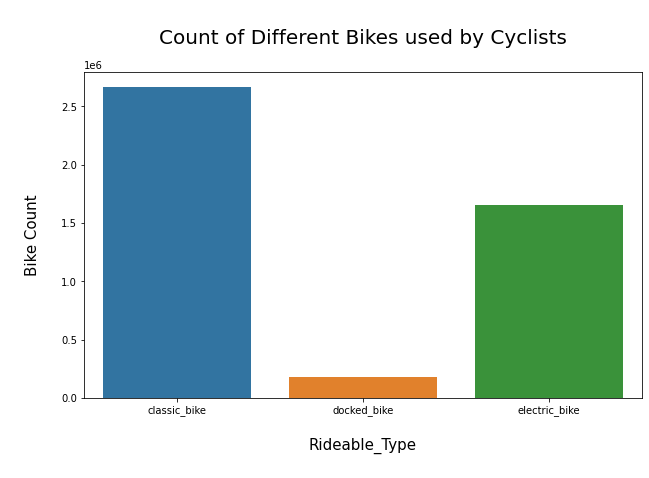

In [19]:
# create a count plot for top bikes
fig = plt.figure(figsize = (10,6))
sns.countplot(x=df.rideable_type)
plt.ylabel('\nBike Count\n',fontsize=15)
plt.xlabel('\nRideable_Type\n',fontsize=15)
plt.title('\nCount of Different Bikes used by Cyclists\n', fontsize=20)
plt.savefig('Top Bikes used by Cyclists.png')
plt.show()

In [20]:
#top 10 start stations used
df['start_station_name'].value_counts().head(10)

Streeter Dr & Grand Ave               72004
DuSable Lake Shore Dr & Monroe St     39566
DuSable Lake Shore Dr & North Blvd    37928
Michigan Ave & Oak St                 37697
Wells St & Concord Ln                 35300
Clark St & Elm St                     33489
Millennium Park                       33343
Kingsbury St & Kinzie St              32177
Theater on the Lake                   31598
Wells St & Elm St                     29793
Name: start_station_name, dtype: int64

In [21]:
df.groupby(['start_station_name', 'member_casual'])['member_casual'].count().sort_values(ascending=False).head()

start_station_name                 member_casual
Streeter Dr & Grand Ave            casual           55562
DuSable Lake Shore Dr & Monroe St  casual           30571
Millennium Park                    casual           24259
Michigan Ave & Oak St              casual           23975
Kingsbury St & Kinzie St           member           23860
Name: member_casual, dtype: int64

Here are the top 5 stations used by the casual members. Mostly for tourist. There is a market gap here so efforts should be made on marketing towards these stations.

In [22]:
# number of member_casual in each group
df['member_casual'].value_counts(normalize=True)

member    0.601406
casual    0.398594
Name: member_casual, dtype: float64

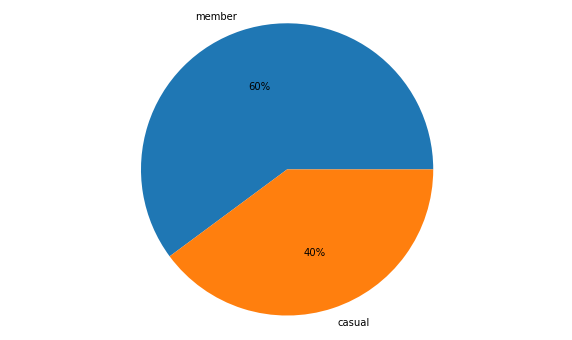

In [23]:
# create a pie-chart of percentage of rides in each group
member_casual_count = df['member_casual'].value_counts()
fig = plt.figure(figsize = (10,6))
plt.pie(member_casual_count, autopct='%.0f%%', labels=['member', 'casual'])
plt.axis('equal')
plt.savefig('% of Cyclisted Riders in member_casual.png')
plt.show()
plt.close()

### Top Bikes used by each member_casual group

In [24]:
# compare bike types used by each group
top_bikes = pd.crosstab(df['rideable_type'],df['member_casual'],margins=True,normalize='columns')
top_bikes

member_casual,casual,member,All
rideable_type,,,
classic_bike,0.503746,0.650728,0.592142
docked_bike,0.098394,0.000000,0.039219
electric_bike,0.397860,0.349272,0.368639


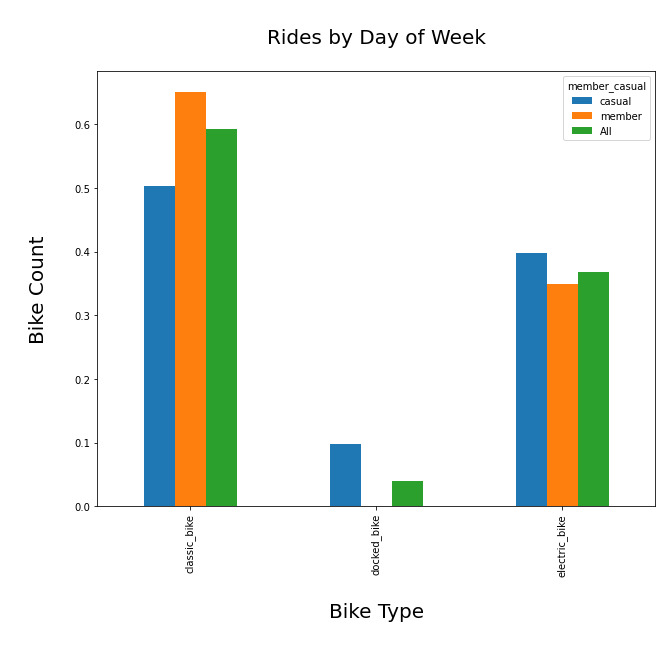

In [25]:
top_bikes.plot(kind = 'bar', figsize=(10,8))
plt.ylabel('\nBike Count\n', fontsize=20)
plt.xlabel('\nBike Type\n', fontsize=20)
plt.title('\nRides by Day of Week\n', fontsize=20)
plt.savefig("Barplot:Top Bike By User group.png")
plt.show()
plt.close();

The most popular bikes by each user group is the classic_bike at 59% market share compared to the rest while the least used bike is the docked bike at 3% market share. However the most interesting part is that the useage of a docked bike is non existant for the member as the casual group takes up all the useage. So there is a market gab here to be utilized.

The electric_bike is the most equal favourite among the 2 groups with little difference in useage of about 0.5%

### 4.1.3 Numerical Data
To get a sense of numerical data, will look at descriptive statistics

In [26]:
print(df.shape)
df[['distance','ride_length']].describe()

(4497898, 22)


,distance,ride_length
count,4.497898e+06,4.497898e+06
mean,1.300807e+00,1.687832e+01
std,8.205870e+00,4.172518e+01
min,0.000000e+00,-1.687000e+02
25%,5.425968e-01,5.966667e+00
50%,9.652863e-01,1.046667e+01
75%,1.689824e+00,1.880000e+01
max,6.093935e+03,3.435407e+04


looks like we have a couple of problems.
1. The minimum distance = 0: which suggest the user did not leave the station.
2. The minimum ride_length =  -1.687000e+0: has a negative value. These two columns could be related
3. max and min values of both columns suggest the data to have outliers

### Removing Outliers

Before we remove outliers first we will inspect and transform rows with negative or zero ride_length. 

In [27]:
#check rows with negative ridetime 
df.loc[df['ride_length'] <= 0].head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,member_casual,ride_length,DayOfWeekNum,DayOfWeek,HourOfDay,NameOfMonth,DayTypes,month_number,Season,distance
13139,162024EA2A5F23AC,electric_bike,2022-08-18 18:16:28,2022-08-18 18:16:28,Cottage Grove Ave & 51st St,TA1309000067,Cottage Grove Ave & 51st St,TA1309000067,41.803033,-87.606626,...,member,0.0,3,Thursday,18,August,Workdays,8,Summer,0.000632
63114,8B5EDA7571220F96,electric_bike,2022-08-05 18:28:39,2022-08-05 18:28:39,Sheridan Rd & Irving Park Rd,13063,Sheridan Rd & Irving Park Rd,13063,41.954142,-87.654422,...,member,0.0,4,Friday,18,August,Workdays,8,Summer,0.007161
65073,09B71177D92C0DC5,classic_bike,2022-08-05 17:40:06,2022-08-05 17:40:06,Michigan Ave & Oak St,13042,Michigan Ave & Oak St,13042,41.900960,-87.623777,...,casual,0.0,4,Friday,17,August,Workdays,8,Summer,0.000000
118326,9EF99F49CDEAF18C,classic_bike,2022-08-30 13:28:47,2022-08-30 13:28:47,Greenview Ave & Diversey Pkwy,13294,Greenview Ave & Diversey Pkwy,13294,41.932590,-87.665936,...,member,0.0,1,Tuesday,13,August,Workdays,8,Summer,0.000000
124380,F63E2BA5D00BBAB8,classic_bike,2022-08-04 15:26:01,2022-08-04 15:26:01,Clarendon Ave & Junior Ter,13389,Clarendon Ave & Junior Ter,13389,41.961004,-87.649603,...,casual,0.0,3,Thursday,15,August,Workdays,8,Summer,0.000000


As suspected, from viewing the data. These users probably never left the stations as start & end station names are the same and the distance btn stations is very minimal. So will drop these rows.

In [28]:
# drop rows with 0 or negative ridetime
df.drop(df[df['ride_length'] <= 0].index , inplace=True)
df.shape

(4497582, 22)

In [29]:
#check rows with zero distance 
df.loc[df['distance'] <= 0].head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,member_casual,ride_length,DayOfWeekNum,DayOfWeek,HourOfDay,NameOfMonth,DayTypes,month_number,Season,distance
271,53A7590B28ED25E2,classic_bike,2022-08-11 23:30:11,2022-08-11 23:30:56,California Ave & Milwaukee Ave,13084,California Ave & Milwaukee Ave,13084,41.922695,-87.697153,...,casual,0.750000,3,Thursday,23,August,Workdays,8,Summer,0.0
329,C34EE790A58C0434,classic_bike,2022-08-21 14:09:08,2022-08-21 15:10:46,California Ave & Division St,13256,California Ave & Division St,13256,41.903029,-87.697474,...,casual,61.633333,6,Sunday,14,August,Weekends,8,Summer,0.0
422,BEE91D557E47FE83,classic_bike,2022-08-21 02:11:26,2022-08-21 03:44:04,California Ave & Milwaukee Ave,13084,California Ave & Milwaukee Ave,13084,41.922695,-87.697153,...,casual,92.633333,6,Sunday,2,August,Weekends,8,Summer,0.0
495,B062265E6FF9D98D,classic_bike,2022-08-19 21:40:21,2022-08-19 21:40:31,California Ave & Division St,13256,California Ave & Division St,13256,41.903029,-87.697474,...,casual,0.166667,4,Friday,21,August,Workdays,8,Summer,0.0
772,4479E16A664544D6,classic_bike,2022-08-16 15:50:44,2022-08-16 15:52:40,Campbell Ave & Montrose Ave,15623,Campbell Ave & Montrose Ave,15623,41.961526,-87.691165,...,casual,1.933333,1,Tuesday,15,August,Workdays,8,Summer,0.0


Now this is interesting. We have rows with zero distance but with some rows having a high ride_length and same start and end stations. This suggests and confirms outliers in the dataset.

In [30]:
# create a scatter plot showing ride_length vs distance
#sns.scatterplot(data = df, x="distance", y="ride_length", hue='member_casual')
#plt.xlabel("distnce (miles)")
#plt.ylabel("ride time (mins)")
#plt.title("Chicago: Ride_length vs Distance");

In [31]:
# Remove outliers by '"ride_time"'
low, high = df["ride_length"].quantile([0.1, 0.9])
mask_area=df["ride_length"].between(low, high)
df=df[mask_area]
print(df.shape)
df[['distance','ride_length']].describe()

(3600215, 22)


,distance,ride_length
count,3.600215e+06,3.600215e+06
mean,1.311479e+00,1.238844e+01
std,7.916743e+00,7.076885e+00
min,0.000000e+00,3.566667e+00
25%,6.727511e-01,6.750000e+00
50%,1.045952e+00,1.046667e+01
75%,1.695066e+00,1.643333e+01
max,6.093935e+03,3.285000e+01


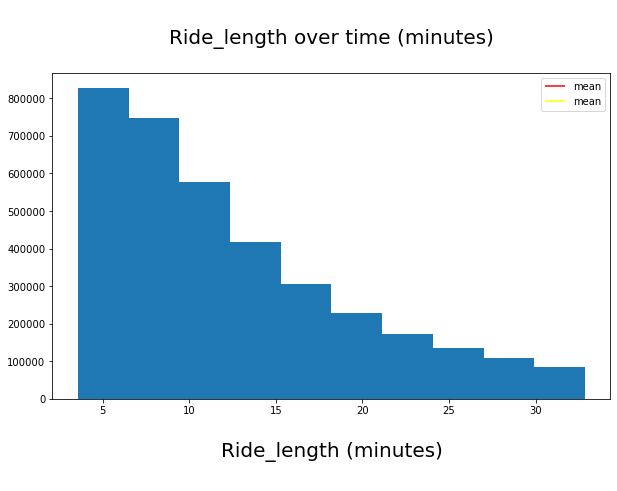

In [32]:
# average ridelength
mean_ride_length = np.mean(df['ride_length'])
# median ridelength
median_ride_length = np.median(df['ride_length'])
# mode ridelength
mode_ride_length = df['ride_length'].mode()

# plot a histogram for ride_length over time
fig = plt.figure(figsize = (10,6))
plt.hist(df['ride_length'])
plt.vlines(x=mean_ride_length, ymin=3.6, ymax=32.9, colors='red', label='mean')
plt.vlines(x=median_ride_length, ymin=3.6, ymax=32.9, colors='yellow', label='mean')
plt.title('\nRide_length over time (minutes)\n', fontsize=20)
plt.xlabel('\nRide_length (minutes)\n', fontsize=20)
plt.legend()
plt.savefig('histogram for ride_length over time.png')
plt.show()

In [33]:
# Remove outliers by '"distance"'
low, high = df["distance"].quantile([0.1, 0.9])
mask_distance=df["distance"].between(low, high)
df=df[mask_distance] 

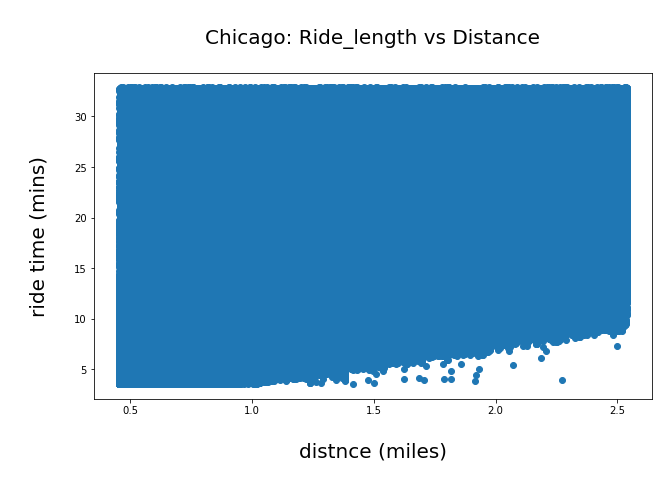

In [34]:
# create a scatter plot showing ride_length vs distance
fig = plt.figure(figsize = (10,6))
plt.scatter(x=df["distance"], y=df["ride_length"])
plt.xlabel("\ndistnce (miles)\n", fontsize=20)
plt.ylabel("\nride time (mins)\n", fontsize=20)
plt.title("\nChicago: Ride_length vs Distance\n", fontsize=20)
plt.savefig('scatter plot:ride_length vs distance.png')
plt.show();

In [35]:
df.shape

(2880593, 22)

In [36]:
# show statistics for all
df.describe()

,start_lat,start_lng,end_lat,end_lng,ride_length,DayOfWeekNum,HourOfDay,month_number,distance
count,2.880593e+06,2.880593e+06,2.880593e+06,2.880593e+06,2.880593e+06,2.880593e+06,2.880593e+06,2.880593e+06,2.880593e+06
mean,4.190254e+01,-8.764578e+01,4.190270e+01,-8.764607e+01,1.132218e+01,3.005554e+00,1.422301e+01,6.950827e+00,1.175166e+00
std,4.041336e-02,2.354988e-02,4.053805e-02,2.368591e-02,5.949802e+00,1.963430e+00,4.997140e+00,2.671256e+00,5.302610e-01
min,4.164850e+01,-8.783325e+01,4.164850e+01,-8.783000e+01,3.566667e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.551701e-01
25%,4.188182e+01,-8.765862e+01,4.188189e+01,-8.765887e+01,6.800000e+00,1.000000e+00,1.100000e+01,5.000000e+00,7.435540e-01
50%,4.189776e+01,-8.764335e+01,4.189820e+01,-8.764395e+01,9.866667e+00,3.000000e+00,1.500000e+01,7.000000e+00,1.046074e+00
75%,4.192632e+01,-8.763083e+01,4.192871e+01,-8.763083e+01,1.433333e+01,5.000000e+00,1.800000e+01,9.000000e+00,1.527632e+00
max,4.206487e+01,-8.752823e+01,4.206485e+01,-8.752823e+01,3.285000e+01,6.000000e+00,2.300000e+01,1.200000e+01,2.538286e+00


Now that we have remove outliers and transformed the data set. We will look at the distribtion of distance and time

## Average "ride_length" for each user group (minutes)

In [37]:
#avgerage ride_length for members and casual riders
avg_ride_length = df.pivot_table(index = ['member_casual'],values = 'ride_length')
avg_ride_length

,ride_length
member_casual,
casual,12.896520
member,10.353966


On average, casuals spend 2.7 more time than members on Cyclistic bike trips, this will probably reflect in the average bike trip distance as well

## Average "ride_length" for each user group by each day of the week

In [38]:
#avgerage ride_length for members and casual riders by day
avg_ride_length_by_day = df.pivot_table(index = ['DayOfWeek'],values = 'ride_length', columns =['member_casual'])
avg_ride_length_by_day

member_casual,casual,member
DayOfWeek,,
Friday,12.739160,10.279270
Monday,12.686314,10.048492
Saturday,14.004535,11.207356
Sunday,13.867428,11.074177
Thursday,12.146780,10.159512
Tuesday,11.928559,9.975052
Wednesday,11.971549,10.091026


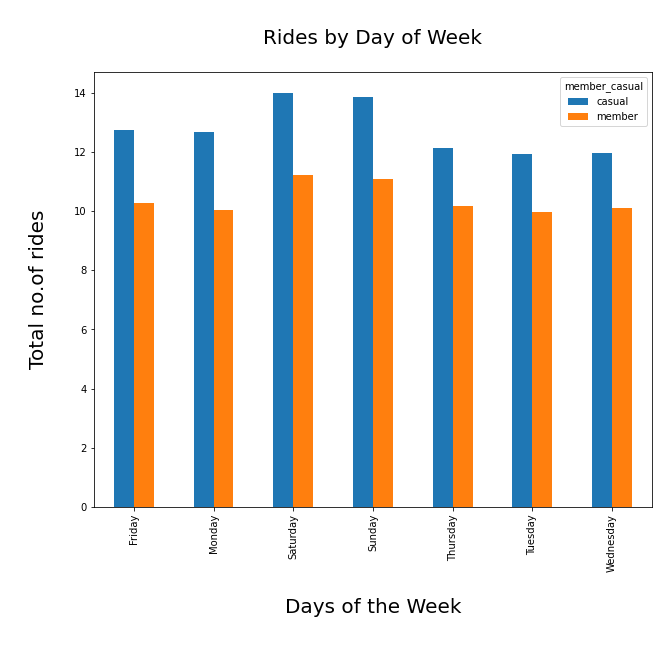

In [39]:
#Compare Rides by day of the week
avg_ride_length_by_day.plot(kind = 'bar', figsize=(10,8))
plt.ylabel('\nTotal no.of rides\n', fontsize=20)
plt.xlabel('\nDays of the Week\n', fontsize=20)
plt.title('\nRides by Day of Week\n', fontsize=20)
plt.savefig("Barplot:Compare Rides by day of the week.png")
plt.show();

On average Casual cyclist take longer rides than on member cyclists rides especially on weekends (saturday and sunday).
However on weekends both groups have their longest ride time compared to the rest of the days. The company can look into bikes which can handle long rides, quality and look to improve conversion


## Busiest days of the week for each group

In [40]:
# Busiest days of the week
weekday_rides = df.pivot_table(index = ['DayOfWeekNum','DayOfWeek'],values = 'ride_id', columns =['member_casual'], aggfunc = 'count')
weekday_rides

,member_casual,casual,member
DayOfWeekNum,DayOfWeek,,
0,Monday,128004.0,254891.0
1,Tuesday,129241.0,289117.0
2,Wednesday,134648.0,285537.0
3,Thursday,150141.0,283559.0
4,Friday,159189.0,245846.0
5,Saturday,218558.0,226153.0
6,Sunday,177158.0,198551.0


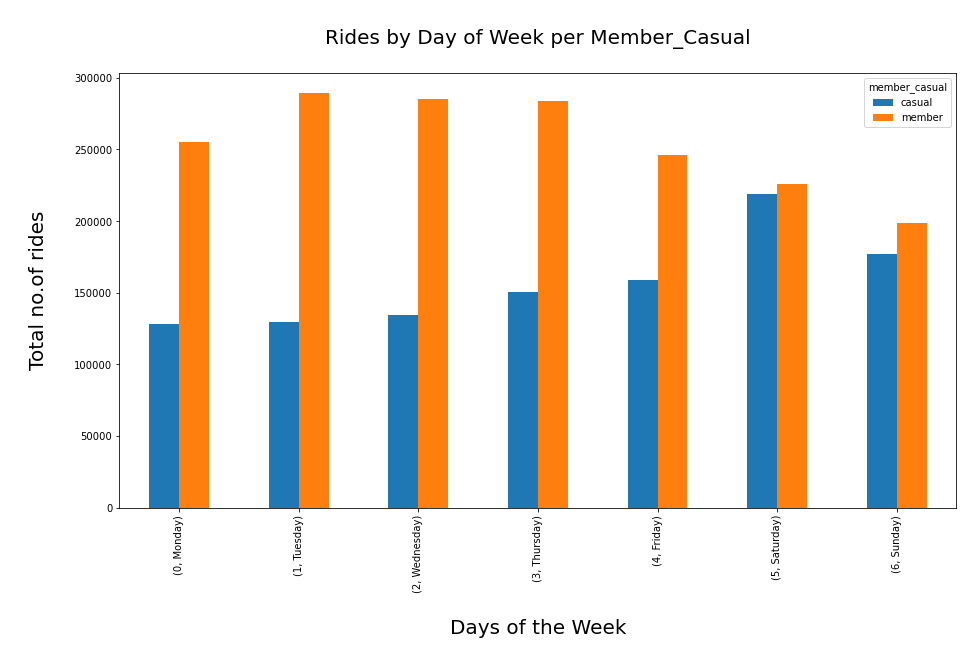

In [41]:
#Compare Rides by day of the week
weekday_rides.plot(kind = 'bar', figsize=(15,8))
plt.ylabel('\nTotal no.of rides\n', fontsize=20)
plt.xlabel('\nDays of the Week\n', fontsize=20)
plt.title('\nRides by Day of Week per Member_Casual\n', fontsize=20)
plt.savefig("Barplot:Compare Rides by day of the week.png")
plt.show();

Tuesdays, Wednesday & Thursday are the busiest days for member groups. Probably because they have to go to work while
Saturday, Sunday and Friday are the busiest for casual group because probably for leisure 

## Total Rides by day of the week & bike type

In [42]:
weekday_rides = df.pivot_table(index = ['DayOfWeekNum','DayOfWeek'],values = 'ride_id', columns =['member_casual','rideable_type'], aggfunc = 'count')
weekday_rides

member_casual                casual                                 member  \
rideable_type          classic_bike docked_bike electric_bike classic_bike   
DayOfWeekNum DayOfWeek                                                       
0            Monday         63873.0      8944.0       55187.0     166911.0   
1            Tuesday        63663.0      7726.0       57852.0     187841.0   
2            Wednesday      65568.0      7792.0       61288.0     183276.0   
3            Thursday       74889.0      8566.0       66686.0     181716.0   
4            Friday         79606.0     10434.0       69149.0     157665.0   
5            Saturday      119774.0     16574.0       82210.0     151863.0   
6            Sunday         95233.0     14036.0       67889.0     133580.0   

member_casual                         
rideable_type          electric_bike  
DayOfWeekNum DayOfWeek                
0            Monday          87980.0  
1            Tuesday        101276.0  
2            Wednesday      102261.0  
3            Thursday       101843.0  
4            Friday          88181.0  
5            Saturday        74290.0  
6            Sunday          64971.0

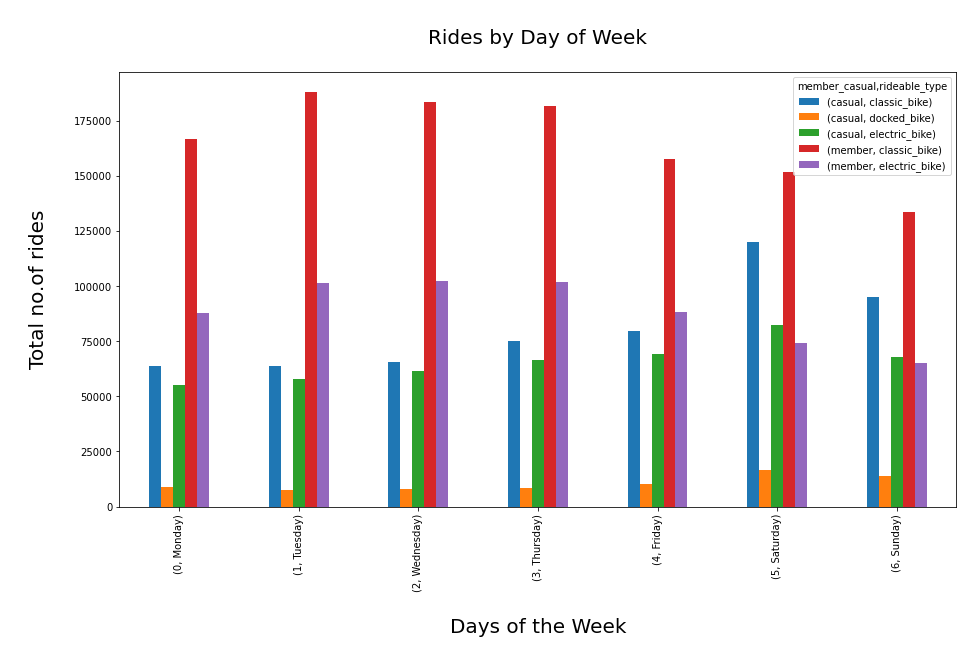

In [43]:
#Compare Rides by day of the week & bike type
weekday_rides.plot(kind = 'bar', figsize=(15,8))
plt.ylabel('\nTotal no.of rides\n', fontsize=20)
plt.xlabel('\nDays of the Week\n', fontsize=20)
plt.title('\nRides by Day of Week\n', fontsize=20)
plt.savefig("Barplot:Compare Rides by day of the week & bike type.png")
plt.show();

The classic_bike is the top most used by both groups through out the week mostly during weekdays (Tuesdays, Wednesday & Thursday) for member user group and (saturday and sunday) for casual user group . The electric_bike is mostly used on weekends especialy on saturday by the casual group  while for members its mostly used on Tuesday, Wednesday and Thursdays. 

The docked_bike is mostly used by casual group on the weekend especially saturday.

The member group doesnt use docked_bikes.



## Busiest Hour used by Cyclists

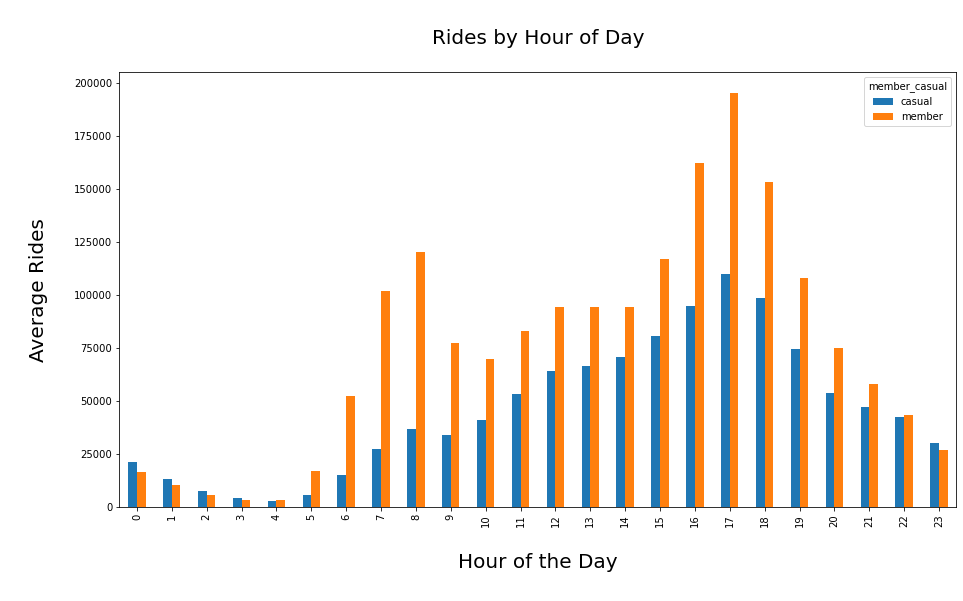

In [44]:
#Compare number of rides by hour of day
#fig = plt.figure(figsize = (50,20))
df_hour = df.pivot_table(index=['HourOfDay'],values='ride_id', columns =['member_casual'],aggfunc='count')
df_hour.plot(kind='bar',figsize=(15,8))
plt.xlabel('\nHour of the Day\n', fontsize=20)
plt.ylabel('\nAverage Rides\n', fontsize=20)
plt.title('\nRides by Hour of Day\n', fontsize=20)
plt.savefig("Barplot:Compare Rides by hour of day.png")
plt.show()
plt.close();

Casual cyclist tend to ride bikes between 7 to 9 am and highest between 4pm to 7pm.

Member cyclists tend to ride bike 7 to 9 am and highest between 3pm to 6pm. Lets visualize with a heat map to compare


## Peak Hours by Week

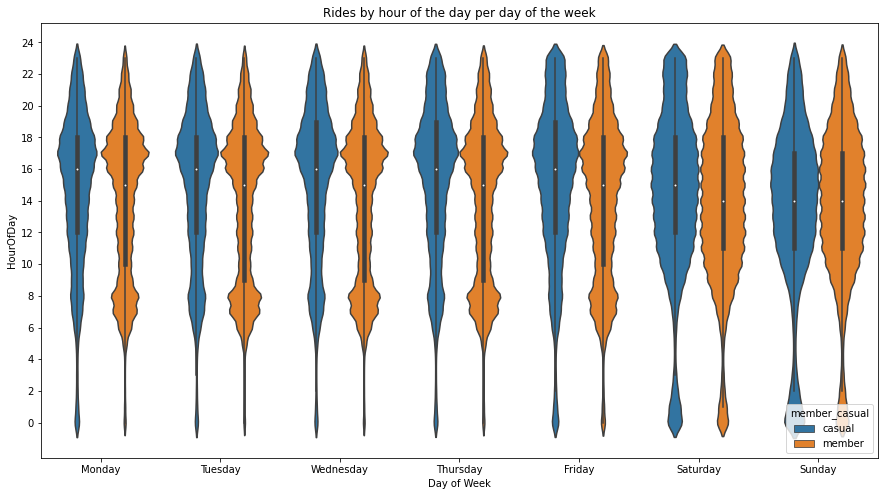

In [45]:
#Identification of peak hours in each day of the week
fig = plt.figure(figsize = (15,8))
ax=fig.add_subplot(111)  
sns.violinplot(x='DayOfWeekNum', y='HourOfDay', hue='member_casual',data = df)
ax.set_xticklabels(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
ax.set(xlabel = 'Day of Week',yticks = np.arange(0,26,2),title = 'Rides by hour of the day per day of the week')
plt.savefig("Violinplot:Peak hours in each day of the week.png")
plt.show();

On average peak hours are around 4 pm for casual groups on weekdays and around 2 to 3pm on weekends. For member group
peak hours are around 3 pm on monday to friday and around 2pm on weekends

## Busiest Stations by Group

Do member_casual very by start station. Which stations are frequently visited

In [46]:
df_station = df.pivot_table(index=['member_casual'],values='ride_id', columns =['start_station_name'],aggfunc='count')
df_station

start_station_name,10101 S Stony Island Ave,111th St - Morgan Park Metra,2112 W Peterson Ave,532 E 43rd St,63rd & Western Ave - north corner,63rd & Western Ave - south corner,63rd St Beach,900 W Harrison St,Abbott Park,Aberdeen St & Jackson Blvd,...,Wood St & Taylor St (Temp),Wood St & Webster Ave,Woodlawn & 103rd - Olive Harvey Vaccination Site,Woodlawn Ave & 55th St,Woodlawn Ave & 75th St,Woodlawn Ave & Lake Park Ave,Yates Blvd & 75th St,Yates Blvd & 93rd St,Yates Blvd & Exchange Ave,Zapata Academy
member_casual,,,,,,,,,,,,,,,,,,,,,
casual,1.0,3.0,244.0,3.0,1.0,2.0,183.0,2284.0,NaN,2141.0,...,628.0,421.0,28.0,1237.0,32.0,136.0,81.0,7.0,3.0,1.0
member,NaN,1.0,388.0,7.0,NaN,4.0,183.0,6134.0,1.0,5923.0,...,4068.0,396.0,6.0,2764.0,16.0,491.0,58.0,23.0,NaN,NaN


In [47]:
#fig = plt.figure(figsize = (20,15))
#sns.heatmap(df_station, annot=df_station.rank(axis="columns"))
#plt.savefig("Heatmap:Compare Stations by member_casual.png")
#plt.title('\nBusiest Stations\n',fontsize=20)
#plt.show();

## Rides by  Month

In [48]:
# Busiest Months
monthly_rides = df.pivot_table(index = ['month_number'],values = 'ride_id', columns =['member_casual'], aggfunc = 'count')
monthly_rides

member_casual,casual,member
month_number,,
1,20010,77675
2,21125,75397
3,39323,99588
4,54888,120453
5,126436,184794
6,176390,217414
7,185228,216578
8,166031,221199
9,140067,207730


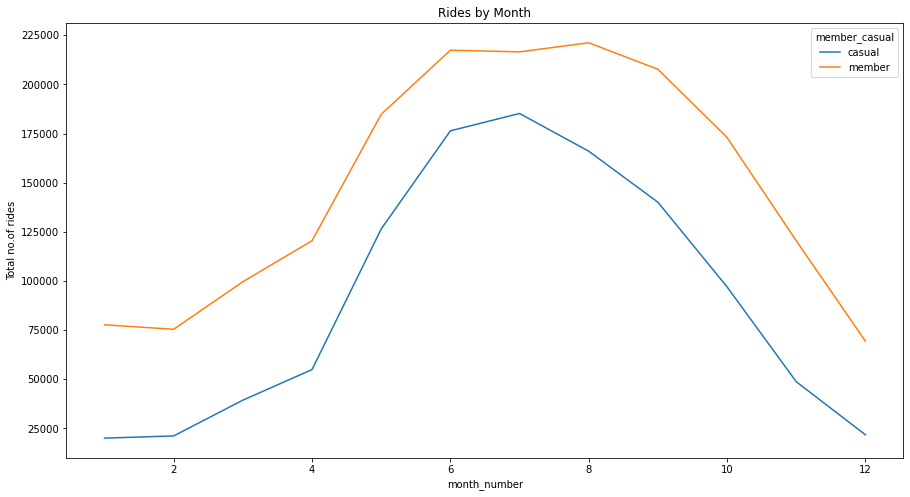

In [49]:
#Compare Rides by day Month
monthly_rides.plot(kind = 'line', figsize=(15,8))
plt.ylabel('Total no.of rides')
plt.title('Rides by Month')
plt.savefig("Lineplot:Compare Rides by Month.png")
plt.show();
#sns.lineplot(data=monthly_rides, x="year", y="passengers")

Top peak months are between June, July, August for casual bike rides group while for member groups, June, July monts are their busiest

January, February and November and December are the least busiest months for both group

## Rides by Season

In [50]:
# Busiest Seasons
season_rides = df.pivot_table(index = ['Season'],values = 'ride_id', columns =['member_casual'], aggfunc = 'count')
season_rides

member_casual,casual,member
Season,,
Fall,285785,501181
Spring,220647,404835
Summer,527649,655191
Winter,62858,222447


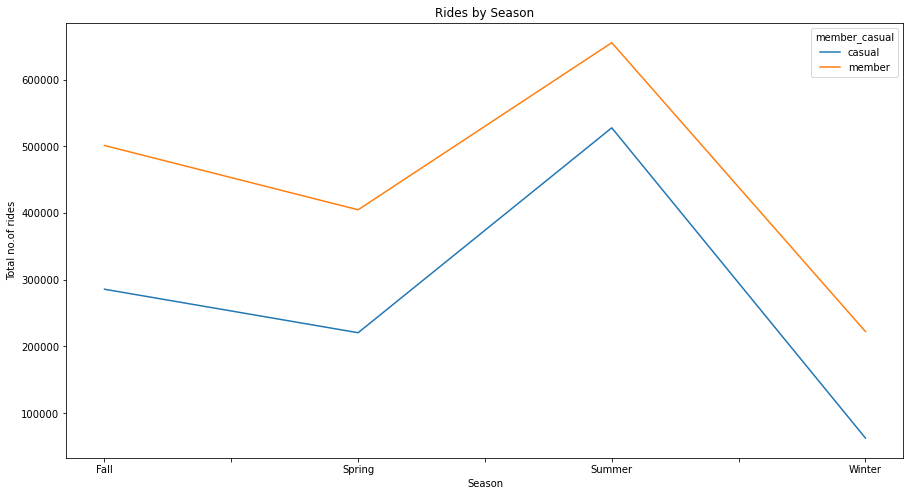

In [51]:
#Compare Rides by Season
season_rides.plot(kind = 'line', figsize=(15,8))
plt.ylabel('Total no.of rides')
plt.title('Rides by Season')
plt.savefig("Lineplot:Compare Rides by Season.png")
plt.show();

No suprise there. Top pick seasons are in the summer for both members and casuals and lowest during winter

In [52]:
# most popular bikes during summer
seasonal_bikes = df.pivot_table(index = ['rideable_type', 'Season'],values = 'ride_id', columns =['member_casual'], aggfunc = 'count')
seasonal_bikes 

member_casual           casual    member
rideable_type Season                    
classic_bike  Fall    128346.0  306493.0
              Spring  124207.0  275190.0
              Summer  282103.0  442638.0
              Winter   27950.0  138531.0
docked_bike   Fall     17279.0       NaN
              Spring   19136.0       NaN
              Summer   34532.0       NaN
              Winter    3125.0       NaN
electric_bike Fall    140160.0  194688.0
              Spring   77304.0  129645.0
              Summer  211014.0  212553.0
              Winter   31783.0   83916.0

 The top most popular bike in the summer is the classic_bike for both ride groups. However the electric bike is popular in both groups in the summer as the diffence is minimal (1539) bike count compared to the total bike count for both groups.

## Weekend vs Weekday Rides

In [53]:
# Busiest Months
weekend_weekday_rides = df.pivot_table(index = ['DayTypes'],values = 'ride_id', columns =['member_casual'], aggfunc = 'count')
weekend_weekday_rides

member_casual,casual,member
DayTypes,,
Weekends,395716,424704
Workdays,701223,1358950


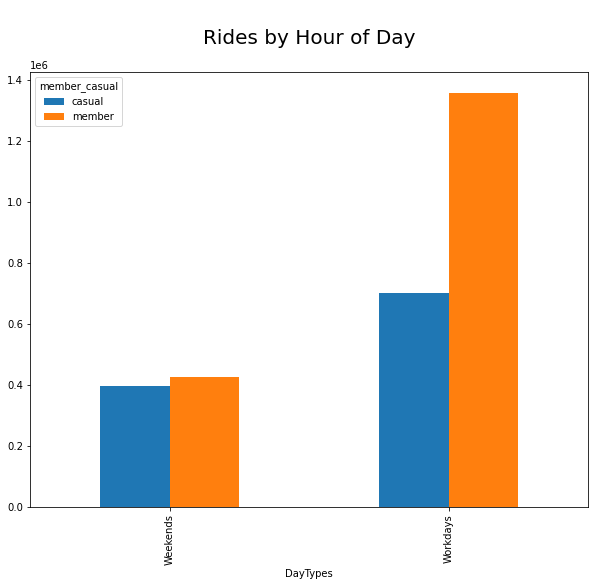

In [54]:
weekend_weekday_rides.plot(kind='bar',figsize=(10,8))
plt.savefig("Barplot:Compare Rides by Weekend vs Weekday")
plt.title('\nRides by Hour of Day\n', fontsize=20)
plt.show();

## Average distance btn stations (miles)

In [55]:
# average distance
avg_ride_distance = df.pivot_table(index=['member_casual'],values='distance')
avg_ride_distance

,distance
member_casual,
casual,1.206371
member,1.155976


<Figure size 1440x576 with 0 Axes>

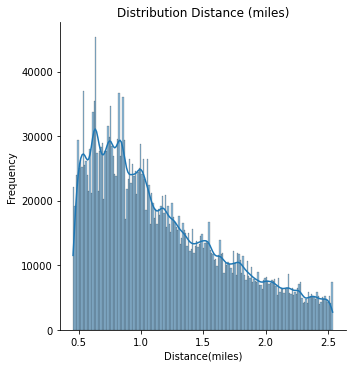

In [58]:
# Distribution of Distance (miles)
fig = plt.figure(figsize =(20, 8))
sns.displot(data=df, x='distance',kde=True)
plt.xlabel('Distance(miles)')
plt.title('Distribution Distance (miles)')
plt.ylabel('Frequency')
plt.savefig("Displot:Distribution of Distance (miles).png")
plt.show();
#sns.displot(data=df, x='distance',kde=True, hue='member_casual', multiple="stack");

In [57]:
#df.to_csv('/Users/phoebenamyalo/Desktop/Google Portfolio Project/csv_new/cyclist-bikeshare-dataset-clean.csv')